# Advanced Data Mining

## Data preprocessing

### Clean dataset and simplify it with lemmatization

In [1]:
import pandas as pd

from scripts.colors import bold
from scripts.preprocess import preprocessing_v2
from scripts.utils import checkpoint, setup, plot_most_popular, plot_length_histogram, plot_least_popular, diff

In [2]:
setup()

Load data from previous step

In [3]:
df = checkpoint("02-english")

rows, cols = df.shape
print("Dataframe contains", bold(f"{rows} rows"), "and", bold(f"{cols} columns"))

Dataframe contains 19936 rows and 20 columns


Check post length histogram

  0%|          | 0/19936 [00:00<?, ?it/s]

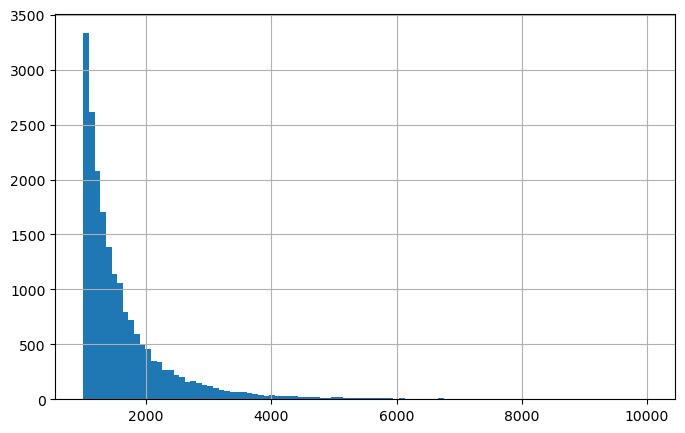

count    19936.000000
mean      1667.579605
std        894.549085
min       1001.000000
25%       1145.750000
50%       1375.000000
75%       1827.000000
max       9999.000000
Name: body, dtype: float64


In [4]:
plot_length_histogram(df['body'])
print(df['body'].apply(len).describe())

Post length is starting from 1001 chars, because we kept in database only rows with more than 1000.

Analyze 30 most popular words in dataset

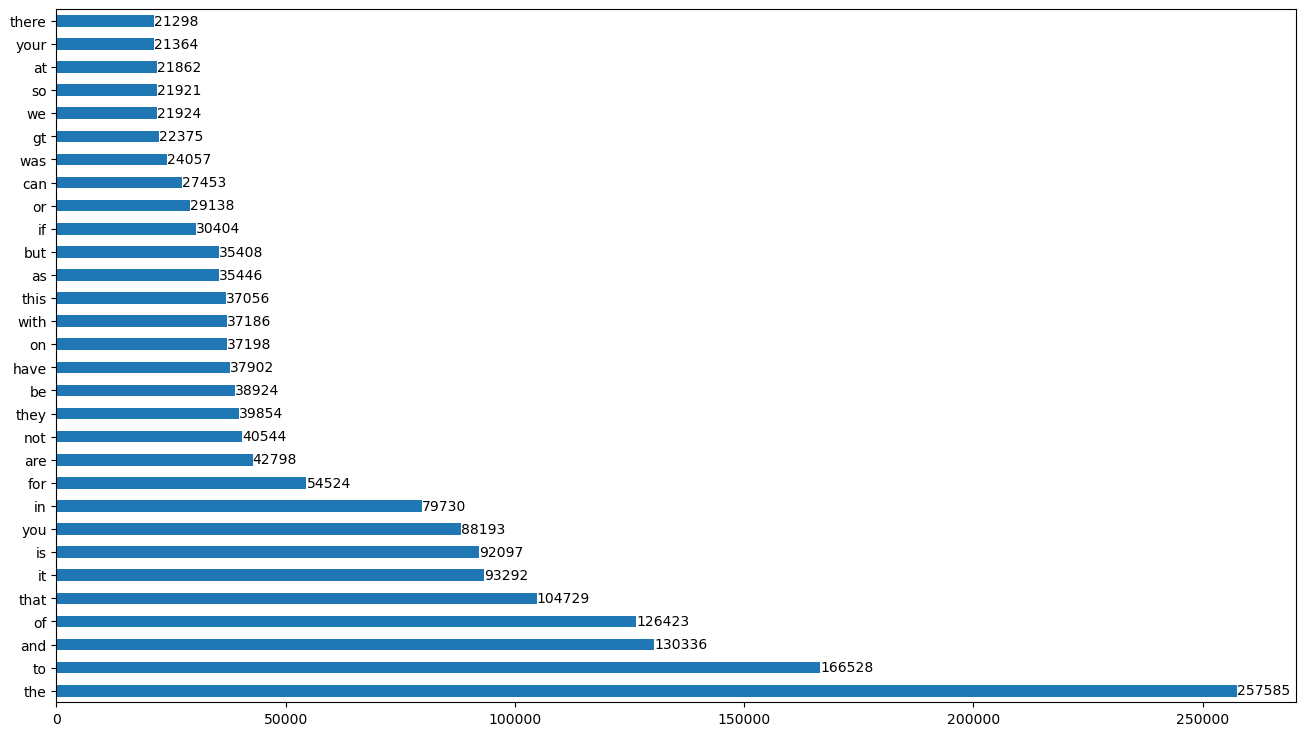

In [5]:
plot_most_popular(df['body'])

As it is shown on a chart above, there are a lot of stopwords in our dataset. `CountVectorizer`, which is used in `plot_most_popular` function, allows to remove stopwords. Removing stopwords will allow to check, what other problems there are with our dataset.

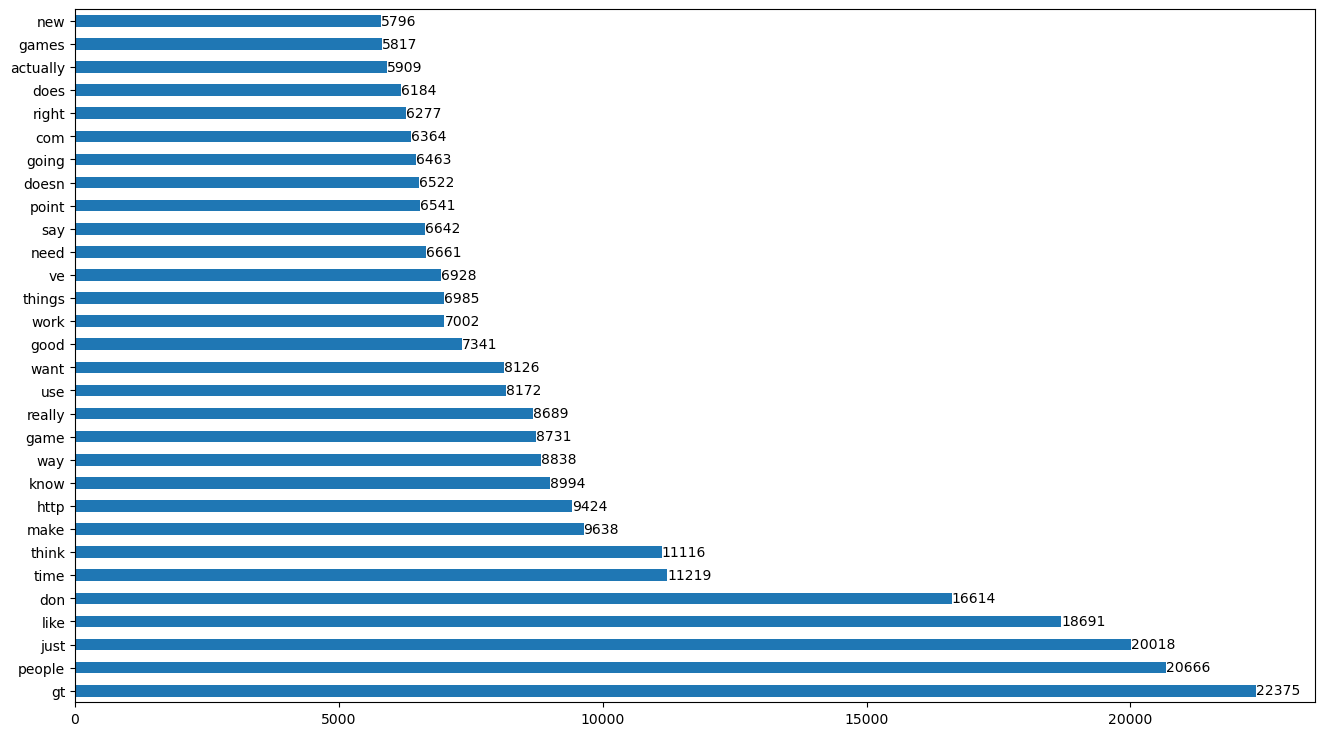

In [6]:
plot_most_popular(df['body'], stop_words='english')

Now we are able to see, that there are some nonwords like `gt`. It comes from `&gt;` and is an HTML entity for `>` (greater than) symbol. As it's encoded, we have to decode it first (and every other encoded character) and then have them removed. Also `http` string can be spotted, which means we will remove all URLs too. Some other actions will take place too:

- converting to lowercase,
- removing special chars,
- removing stopwords,
- tokenization,
- lemmatization.

This will provide us smaller, cleaner and simpler dataset, without meaningless data.

In [7]:
df['original'] = df['body'].copy()
df['body'] = df['body'].progress_apply(preprocessing_v2)

  0%|          | 0/19936 [00:00<?, ?it/s]

Now, most popular words should look better

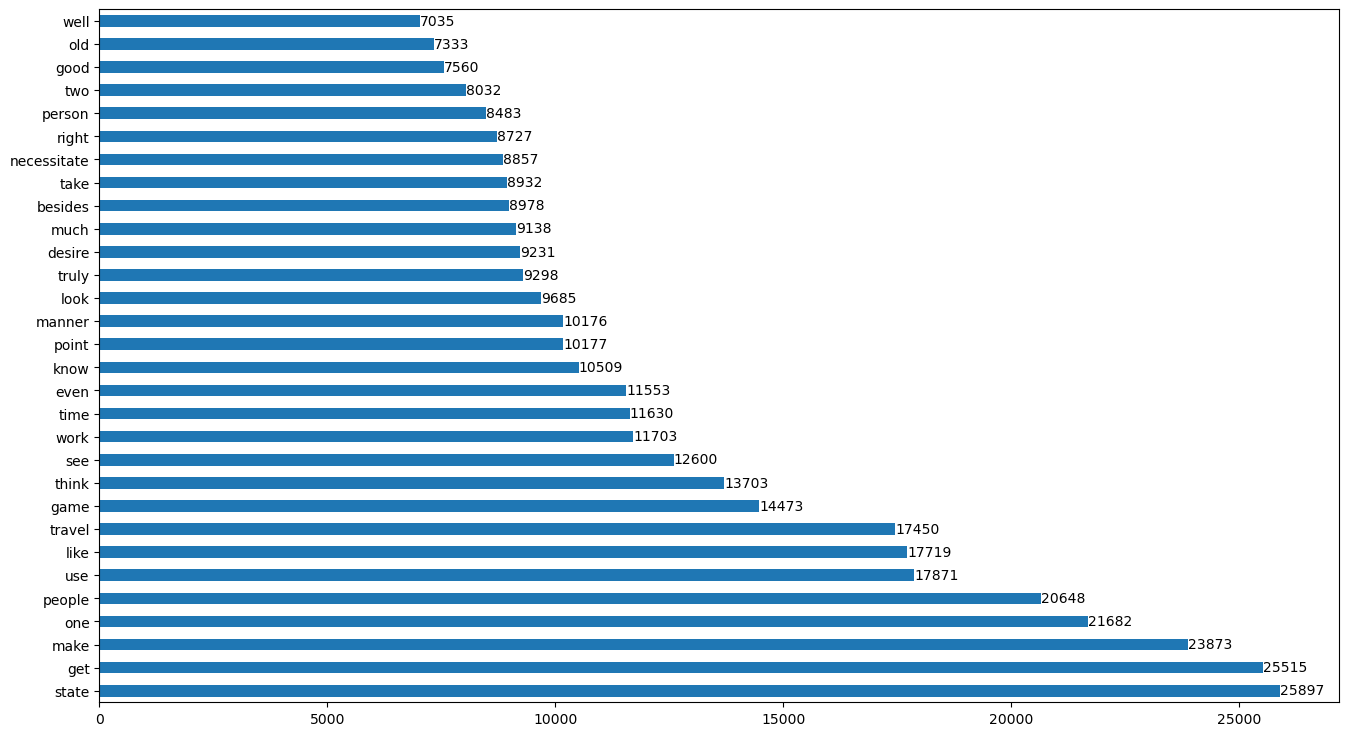

In [8]:
plot_most_popular(df['body'])

Let's compare, how data has changed

In [9]:
diff(df['original'].iloc[0], df['body'].iloc[0])

Original: Yeah, but how many of these people are actually doing it just to wreck Verizon's infrastructure? How many of them would stop if unlimited data wasn't a special gem, but a standard package, or even one available as a separate tier?

I think quite a few people are doing it for revenge. Assuming their numbers are correct. I have unlimited with Verizon, and going to school three days a week I can use 5 GBs a month. I could probably hit 10 GBs if I left the house more often. Assuming those are heavy users, they would probably cut down their usage to 1/10th of what it is if they weren't trying to squeeze the most out of it before Verizon find some legal loophole to shut them down. After all, some of us are paying $80 a line, the "subsidized phone" price, for the privilege of having unlimited data *and* having to buy our own phones to keep that package. It's not like Verizon isn't making a ton of money off of these people. It just has no way to enforce arbitrary restrictions on how 

Chart looks promising, but we also have to check least popular words

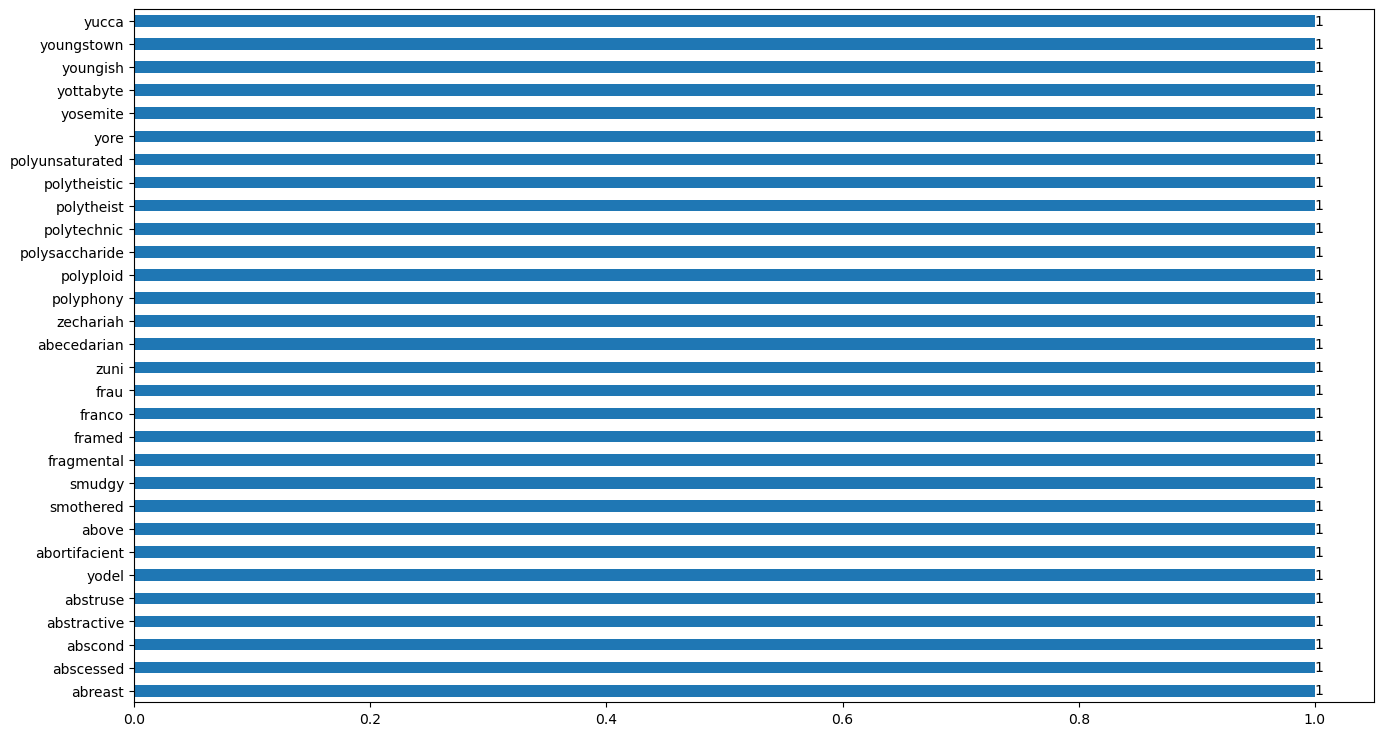

In [10]:
plot_least_popular(df['body'])

With this method, we can be sure, that our dataset is both cleaned and simplified. We can remove duplicates now.

In [11]:
rows_count = df.shape[0]
df: pd.DataFrame = df.replace("", None).dropna(subset=['body']).drop_duplicates(subset=['body', 'subreddit'])
rows_count = rows_count - df.shape[0]
print(rows_count, 'row' if rows_count == 1 else 'rows', 'affected')

rows, cols = df.shape
print("Dataframe contains", bold(f"{rows} rows"), "and", bold(f"{cols} columns"))

3 rows affected
Dataframe contains 19933 rows and 21 columns


After such data cleaning, our dataset became smaller, so let's have a look on post length histogram

  0%|          | 0/19933 [00:00<?, ?it/s]

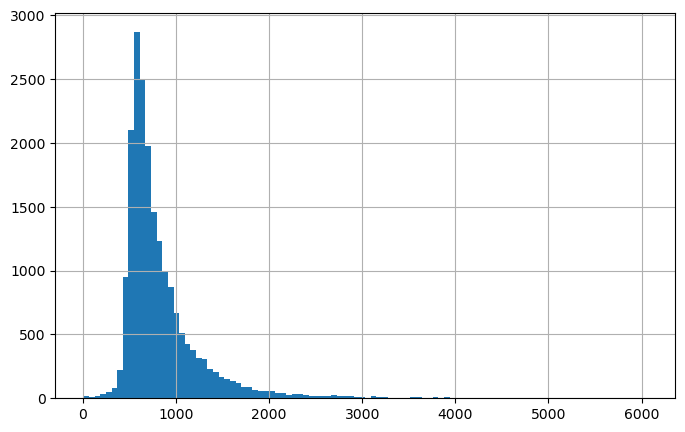

count    19933.000000
mean       847.731350
std        473.305697
min          6.000000
25%        582.000000
50%        705.000000
75%        945.000000
max       6059.000000
Name: body, dtype: float64


In [12]:
plot_length_histogram(df['body'])
print(df['body'].apply(len).describe())

There is weird short entry, let's check what was inside of it, and what is now

In [13]:
shortest_post = df.sort_values(by=['body'], key=lambda x: x.str.len()).iloc[0]
diff(shortest_post['original'], shortest_post['body'])

Original:     #
     ##
     ###
      ####
       #####                       SICP  
       #######                     IS NOT BATMAN!!
        #######
        ########
        ########
        #########
        ##########
       ############
     ##############
     ################
      ################
        ##############
         ##############                                              ####
         ##############                                           #####
          ##############                                      #######
          ##############                                 ###########
          ###############                              #############
          ################                           ##############
         #################      #                  ################
         ##################     ##    #           #################
        ####################   ###   ##          #################
             ################  ########    

In [14]:
_ = checkpoint("03-cleaned", dataframe=df)